# Assignment 03: Airbnb Price Classification


Assignment 3 includes 6 parts. For each part you need to modify the notebook by adding your own programming solutions or written text. 

Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

## Notes about the exercise notebook

1. The Python code cells where you should make changes contain text that reads:

    ```Python

    # YOUR CODE HERE
    raise NotImplementedError()
    
    ```
    <br/>**You should delete that text and replace it with your solution (code)**.

   
   <br><br/>
2. The Markdown cells where you should make changes contain text that reads:

    ```text
    
    YOUR ANSWER HERE
    ```
    <br/>**You should delete that text and replace it with your answer**.
<br><br/>

3. Some of the cells in this Jupyter Notebook are `# test-cell`, which means that you must not edit them.




## Overview:
In this assignment, you will explore the fascinating intersection of data science, geography, and urban economics by working with spatial data from Airbnb listings. Your task is to develop a classification model to predict Airbnb rental prices based on various spatial features and attributes. By leveraging machine learning algorithms and geospatial analysis techniques, you will gain insights into the factors influencing rental prices in different neighborhoods and urban environments.

Through this assignment, you will:
- Gain hands-on experience in working with real-world spatial data from Airbnb listings.
- Learn how to preprocess and engineer spatial features for classification tasks.
- Implement and evaluate machine learning algorithms for predicting rental prices.
- Analyze the spatial patterns and factors driving Airbnb prices in different areas.


## Part 1: Data Collection

### Step 1: Download the Airbnb dataset for your chosen city or region.

#### Instructions:

1. **Access the Excel Sheet:** Access the provided Excel sheet containing the list of city names on OneDrive. You can find the link to the Excel sheet below.

    Link to the excel sheet:
    [Airbnb_city_names.xlsx](https://uofc-my.sharepoint.com/:x:/g/personal/reza_safarzadehramho_ucalgary_ca/Eczw2H55Y6RMu_-d6A2oKNUBJ62T-c3-xWi7LO4ZHaXx7A)

2. **Choose a City or Region:** Select a city or region of interest for your analysis. You can choose any city where Airbnb operates, or one that aligns with your research interests.

3. **Avoid Duplicate Selections:** Check the Excel sheet to ensure that no other student has already selected the same city. Avoid selecting a city that has already been chosen by another student to prevent duplicate selections.

4. **Download Airbnb Data:** Obtain the Airbnb dataset (in the form of `listings.csv.gz`) for your chosen city from Inside Airbnb (http://insideairbnb.com/). The dataset should include information about Airbnb listings, including attributes such as property type, location, number of beds, and price.

5. **Import Data into Python:** Load the downloaded dataset into a pandas DataFrame using Python. You can use pandas' `read_csv()` function to import data from a CSV file or any other suitable method.

Airbnb data has so many columns, some of the more important features this assignment will look into are the following: 

- `room_type`: The type of room being rented out. This can be one of 'Entire home/apt', 'Private room', or 'Shared room'.
- `accommodates`: the number of guests the rental can accommodate
- `beds`: number of beds included in the rental
- `price`: nightly price for the rental
- `review_scores_rating`: Average rating score given by guests for the listing



Note:

*Airbnb does not release any data on the listings in its marketplace, but separate group named [Inside Airbnb](http://insideairbnb.com/get-the-data.html) scrapes and compiles publicly available information about many cities Airbnb's listings from the Airbnb web-site.*

In [4]:
# import required libraries
import pandas as pd

# Replace 'file_path.csv' with the path to your downloaded Airbnb dataset
file_path = './Assignment_3/listings.csv.gz'

# Import Airbnb data into a pandas DataFrame
airbnb_data = pd.read_csv(file_path)

In [5]:
######### This is a test-cell that print the first few rows of the DataFrame #########

pd.set_option('display.max_columns', len(airbnb_data.columns))
airbnb_data.head(3)

id                         listing_url       scrape_id last_scraped  \
0   8357   https://www.airbnb.com/rooms/8357  20231230181010   2023-12-31   
1  11879  https://www.airbnb.com/rooms/11879  20231230181010   2023-12-31   
2  31721  https://www.airbnb.com/rooms/31721  20231230181010   2023-12-31   

        source                                               name  \
0  city scrape  Dome in Aptos · ★4.88 · 1 bedroom · 2 beds · 1...   
1  city scrape  Home in Aptos · ★4.82 · 1 bedroom · 1 bed · 1 ...   
2  city scrape  Cottage in Santa Cruz · ★4.73 · 1 bedroom · 1 ...   

   description                              neighborhood_overview  \
0          NaN  Even though we live only an 8-10 minute drive ...   
1          NaN                                                NaN   
2          NaN  I love everything about this neighborhood.  I ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    24281   
1  https://a0.muscache.com/pictures/5acb8501-4855...    44764   
2  https://a0.muscache.com/pictures/73aa203a-cb53...   136376   

                                   host_url          host_name  host_since  \
0   https://www.airbnb.com/users/show/24281  Kitty And Michael  2009-07-03   
1   https://www.airbnb.com/users/show/44764             Steven  2009-10-09   
2  https://www.airbnb.com/users/show/136376              Annie  2010-06-01   

    host_location                                         host_about  \
0       Aptos, CA  We live on 10 beautiful acres of sun, oak fore...   
1       Aptos, CA  Easygoing, environmentalist, musician/educator...   
2  Santa Cruz, CA  Hey Airbnb folks thanks for taking the time to...   

   host_response_time host_response_rate host_acceptance_rate  \
0  within a few hours               100%                  98%   
1  within a few hours                90%                  65%   
2  within a few hours               100%                  86%   

  host_is_superhost                                 host_thumbnail_url  \
0                 t  https://a0.muscache.com/im/pictures/user/78101...   
1                 f  https://a0.muscache.com/im/pictures/user/f6274...   
2                 t  https://a0.muscache.com/im/pictures/user/06955...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/78101...         Santa Cruz   
1  https://a0.muscache.com/im/pictures/user/f6274...         Santa Cruz   
2  https://a0.muscache.com/im/pictures/user/06955...         Santa Cruz   

   host_listings_count  host_total_listings_count  host_verifications  \
0                    2                          2  ['email', 'phone']   
1                    3                          9  ['email', 'phone']   
2                    2                          2  ['email', 'phone']   

  host_has_profile_pic host_identity_verified  \
0                    t                      t   
1                    t                      t   
2                    t                      f   

                           neighbourhood neighbourhood_cleansed  \
0       Aptos, California, United States   Unincorporated Areas   
1                                    NaN   Unincorporated Areas   
2  Santa Cruz, California, United States       City of Capitola   

   neighbourhood_group_cleansed  latitude  longitude         property_type  \
0                           NaN  37.00939 -121.88547                  Dome   
1                           NaN  36.98048 -121.88129  Private room in home   
2                           NaN  36.95849 -121.97207        Entire cottage   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             3        NaN         1 bath       NaN   2.0   
1     Private room             2        NaN  1 shared bath       NaN   1.0   
2  Entire home/apt             2        NaN         1 bath       NaN   1.0   

  amenities    price  minimum_nights

### Step 2: Download Tourism Points of Interest using OSMnx

#### Task:
Utilize the `OSMnx` library to download tourism-related points of interest (POIs) for your selected city or region from OpenStreetMap (OSM).

#### Overview of OpenStreetMap (OSM):
OpenStreetMap (OSM) is a collaborative mapping project that provides freely accessible geospatial data contributed by volunteers worldwide. It contains detailed information about various geographic features, including roads, buildings, landmarks, and points of interest.

#### Importance of Tourism Points of Interest (POIs):
In this task, we will focus on downloading tourism-related points of interest (POIs) from OpenStreetMap (OSM) to enrich our analysis of Airbnb prices. Tourism POIs such as attractions, landmarks, museums, and other tourist destinations play a significant role in influencing rental prices in urban areas. By incorporating these spatial features into our analysis, we can capture the proximity and accessibility of key tourist attractions, which may affect the demand and pricing dynamics of Airbnb listings in different neighborhoods.

#### Instructions:
1. **Install OSMnx Library:** If you haven't already done so, install the `OSMnx` library in your Python environment `pip install osmnx` (for more info : https://osmnx.readthedocs.io/en/stable/installation.html)

2. **Download Tourism POIs:** Next, use OSMnx `features_from_place()` to download tourism-related points of interest (POIs) for your chosen city or region. Specify relevant tags such as 'tourism' to retrieve attractions, landmarks, museums, and other tourist destinations.




In [6]:
# import required libraries
import osmnx as ox
import geopandas as gpd


# Define the city or region of interest
city = "Santa Cruz County"

# Define the tags for tourism-related POIs
tags = {"tourism": True}

# fetch the tourist attractions
tourism_pois = ox.geometries.geometries_from_place(city, tags)


C:\Users\AL-WASI\AppData\Local\Temp\ipykernel_14340\3450096359.py:13: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  tourism_pois = ox.geometries.geometries_from_place(city, tags)


In [7]:
######### This is a test-cell that print the first few rows of the tourism_pois DataFrame #########

tourism_pois.head(3)

name     tourism  \
element_type osmid                                            
node         91069827   Buzzard Lagoon Overview   viewpoint   
             333533551             Wilder Ranch  attraction   
             358768840                La Corona   viewpoint   

                                           geometry historic  ele  \
element_type osmid                                                  
node         91069827   POINT (-121.83881 37.04988)      NaN  NaN   
             333533551  POINT (-122.08299 36.96087)      yes  NaN   
             358768840  POINT (-121.99691 37.00662)      NaN  137   

                       gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                   
node         91069827             NaN          NaN             NaN   
             333533551            NaN          NaN             NaN   
             358768840            087   01/19/1981          226701   

                       gnis:state_id natural addr:state building  \
element_type osmid                                                 
node         91069827            NaN     NaN        NaN      NaN   
             333533551           NaN     NaN        NaN      NaN   
             358768840            06    peak        NaN      NaN   

                       gnis:county_name gnis:import_uuid source addr:city  \
element_type osmid                                                          
node         91069827               NaN              NaN    NaN       NaN   
             333533551              NaN              NaN    NaN       NaN   
             358768840              NaN              NaN    NaN       NaN   

                       addr:street  fee opening_hours operator website  \
element_type osmid                                                       
node         91069827          NaN  NaN           NaN      NaN     NaN   
             333533551         NaN  NaN           NaN      NaN     NaN   
             358768840         NaN  NaN           NaN      NaN     NaN   

                       wikidata wikipedia gnis:reviewed gnis:feature_type  \
element_type osmid                                                          
node         91069827       NaN       NaN           NaN               NaN   
             333533551      NaN       NaN           NaN               NaN   
             358768840      NaN       NaN           NaN               NaN   

                       leaf_cycle name:etymology:wikidata start_date  \
element_type osmid                                                     
node         91069827         NaN                     NaN        NaN   
             333533551        NaN                     NaN        NaN   
             358768840        NaN                     NaN        NaN   

                       information amenity leisure highway leaf_type  \
element_type osmid                                                     
node         91069827          NaN     NaN     NaN     NaN       NaN   
             333533551         NaN     NaN     NaN     NaN       NaN   
             358768840         NaN     NaN     NaN     NaN       NaN   

                       addr:housenumber wheelchair capacity note  ...  \
element_type osmid                                                ...   
node         91069827               NaN        NaN      NaN  NaN  ...   
             333533551              NaN        NaN      NaN  NaN  ...   
             358768840              NaN        NaN      NaN  NaN  ...   

                       official_name disused:brand disused:brand:wikidata  \
element_type osmid                                                          
node         91069827            NaN           NaN                    NaN   
             333533551           NaN           NaN                    NaN   
             358768840           NaN           NaN                    NaN   

                       old_name   ID SHAPE_area SHAPE_len attribution  \

## Part 2: Data Cleaning and Preparation


### Step 1: Cleaning and Preparing Airbnb Data

#### Task:
Clean and prepare the Airbnb dataset by selecting relevant columns and removing missing values.

#### Instructions:
1. **Select Relevant Columns:** Keep only the following columns from the Airbnb dataset:
   - `Latitude`: Latitude coordinates of the listing.
   - `Longitude`: Longitude coordinates of the listing.
   - `Room Type`: Type of room available for rent (e.g., Entire home/apt, Private room, Shared room).
   - `Accommodates`: Number of guests the listing can accommodate.
   - `Beds`: Number of beds available in the listing.
   - `Price`: Rental price per night.
   - `Review Scores Rating`: Average rating score given by guests for the listing.
   
2. **Remove Missing Values:** Remove any rows with missing values in the selected columns. Ensure that the dataset is clean and ready for further analysis.

3. **Check Column Types:** Sometimes, in Airbnb dataset, the prices are collected as string like "\$800". As we need the prices to be numberical values, we have to make sure the prices are as type `float`. Check if 'price' column is string type, convert the column to float by using `.replace()` to remove $ and save column `.astype(float)`.


In [8]:

# Select relevant columns
relevant_columns = ['latitude', 'longitude', 'room_type', 'accommodates', 'beds', 'price', 'review_scores_rating']

airbnb_data = airbnb_data[relevant_columns]

#airbnb_data_cleaned 

# Remove missing values
airbnb_data_cleaned = airbnb_data.dropna()

# Check if 'price' column is string type
if airbnb_data_cleaned['price'].dtype == 'object':
    # Remove '$' sign and convert to float
    airbnb_data_cleaned['price'] = airbnb_data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

# Display the data types of all columns to verify
print(airbnb_data_cleaned.dtypes)


latitude                float64
longitude               float64
room_type                object
accommodates              int64
beds                    float64
price                   float64
review_scores_rating    float64
dtype: object


<>:14: DeprecationWarning: invalid escape sequence '\$'
<>:14: DeprecationWarning: invalid escape sequence '\$'
C:\Users\AL-WASI\AppData\Local\Temp\ipykernel_14340\3302624000.py:14: DeprecationWarning: invalid escape sequence '\$'
  airbnb_data_cleaned['price'] = airbnb_data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\AL-WASI\AppData\Local\Temp\ipykernel_14340\3302624000.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data_cleaned['price'] = airbnb_data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)


In [9]:
######### This is a test-cell that print the info of the airbnb_data_cleaned DataFrame #########

airbnb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1419 entries, 0 to 1623
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude              1419 non-null   float64
 1   longitude             1419 non-null   float64
 2   room_type             1419 non-null   object 
 3   accommodates          1419 non-null   int64  
 4   beds                  1419 non-null   float64
 5   price                 1419 non-null   float64
 6   review_scores_rating  1419 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.7+ KB


In [10]:
######### This is a test-cell that print the first few rows of the airbnb_data_cleaned DataFrame #########

airbnb_data_cleaned.head(3)

latitude  longitude        room_type  accommodates  beds  price  \
0  37.00939 -121.88547  Entire home/apt             3   2.0  168.0   
1  36.98048 -121.88129     Private room             2   1.0   95.0   
2  36.95849 -121.97207  Entire home/apt             2   1.0  197.0   

   review_scores_rating  
0                  4.88  
1                  4.82  
2                  4.73

### Step 2: Cleaning Tourism Points of Interest (POI) Data

#### Task:
Clean the tourism points of interest (POI) dataset by selecting relevant columns and removing missing values.

#### Instructions:
1. **Select Relevant Columns:** Keep only the following columns from the tourism points of interest (POI) dataset:
   - `Name`: Name of the point of interest.
   - `Tourism`: Type of tourism-related attraction (e.g., museum, landmark, attraction).
   - `Geometry`: Geometric representation (coordinates) of the point of interest.
   
2. **Remove Missing Values:** Remove any rows with missing values in the selected columns. Ensure that the dataset is clean and ready for further analysis.


In [11]:
import pandas as pd

# Load the tourism points of interest (POI) dataset

# Select relevant columns
relevant_columns = ['name', 'tourism', 'geometry']
poi_data = tourism_pois[relevant_columns]

# Remove missing values
poi_data = poi_data.dropna()

# Display the first few rows of the cleaned dataset
print(poi_data.head())


tourism_pois_cleaned = poi_data



                                                   name     tourism  \
element_type osmid                                                    
node         91069827           Buzzard Lagoon Overview   viewpoint   
             333533551                     Wilder Ranch  attraction   
             358768840                        La Corona   viewpoint   
             368166855  Santa Cruz Art League Galleries     artwork   
             368174060        Santa Cruz Surfing Museum      museum   

                                           geometry  
element_type osmid                                   
node         91069827   POINT (-121.83881 37.04988)  
             333533551  POINT (-122.08299 36.96087)  
             358768840  POINT (-121.99691 37.00662)  
             368166855  POINT (-122.01710 36.97331)  
             368174060  POINT (-122.02671 36.95146)  


In [12]:
######### This is a test-cell that print the info of the tourism_pois_cleaned DataFrame #########

tourism_pois_cleaned.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 400 entries, ('node', 91069827) to ('relation', 15894383)
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      400 non-null    object  
 1   tourism   400 non-null    object  
 2   geometry  400 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 32.8+ KB


In [13]:
######### This is a test-cell that print the first few rows of the tourism_pois_cleaned DataFrame #########

tourism_pois_cleaned.head(3)

name     tourism  \
element_type osmid                                            
node         91069827   Buzzard Lagoon Overview   viewpoint   
             333533551             Wilder Ranch  attraction   
             358768840                La Corona   viewpoint   

                                           geometry  
element_type osmid                                   
node         91069827   POINT (-121.83881 37.04988)  
             333533551  POINT (-122.08299 36.96087)  
             358768840  POINT (-121.99691 37.00662)

## Part 3: Exploratory Data Analysis (EDA)



### Step 1: Exploratory Data Analysis on Airbnb Dataset

#### Task:
Conduct exploratory data analysis (EDA) on the cleaned Airbnb dataset by plotting histograms of selected columns.

#### Instructions:
1. **Plot Histograms:** You can use `seaborn` or `matplotlib` to plot histograms for selected columns in the cleaned Airbnb dataset to visualize the distributions of key attributes such as accommodation capacity, number of beds, rental prices, and review scores.



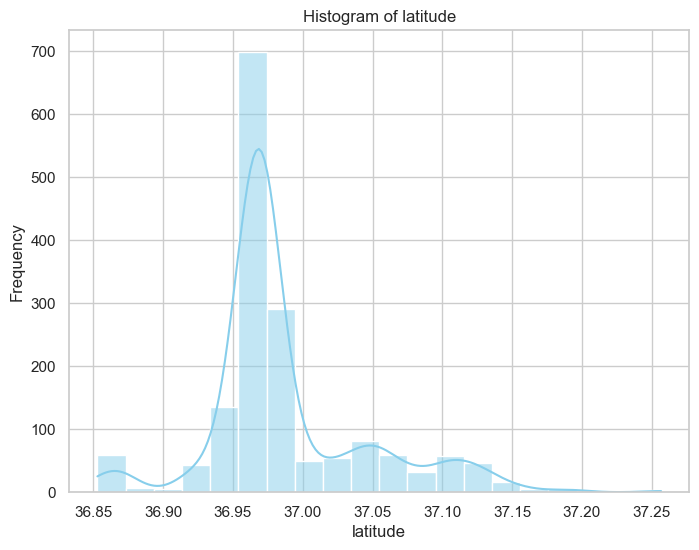

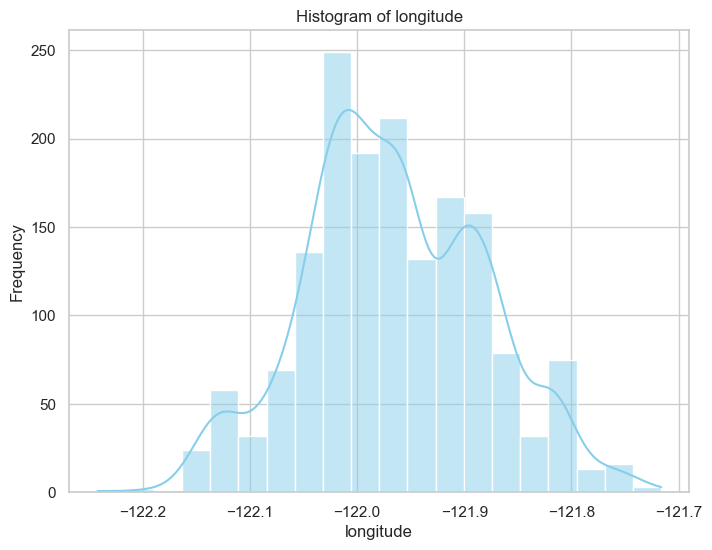

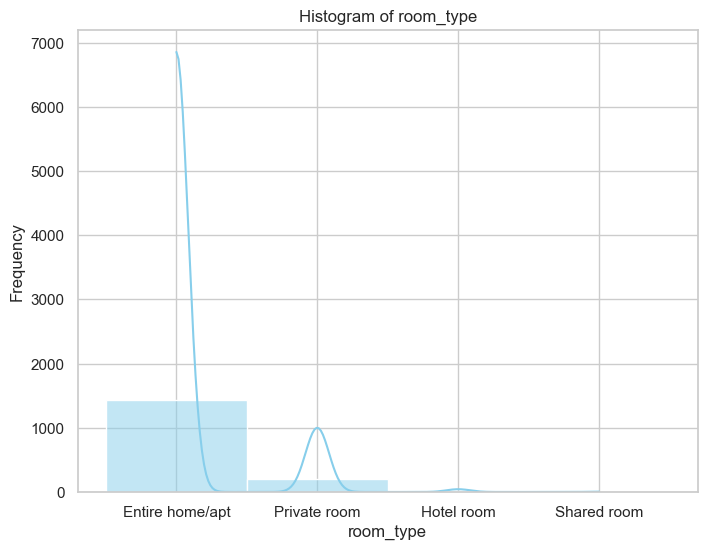

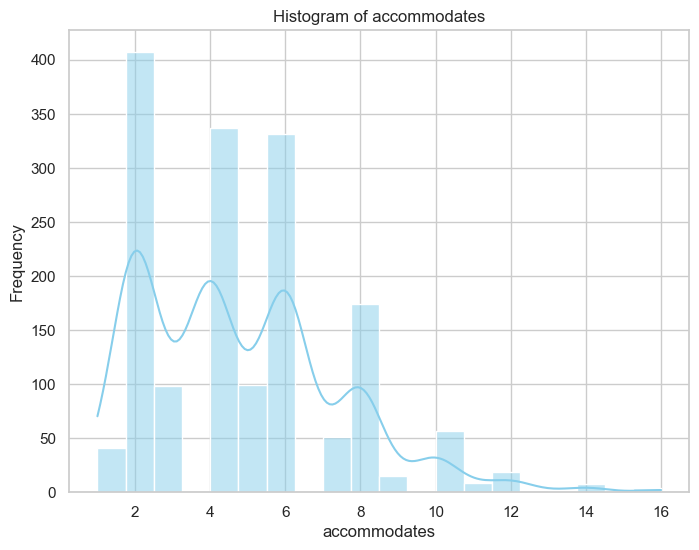

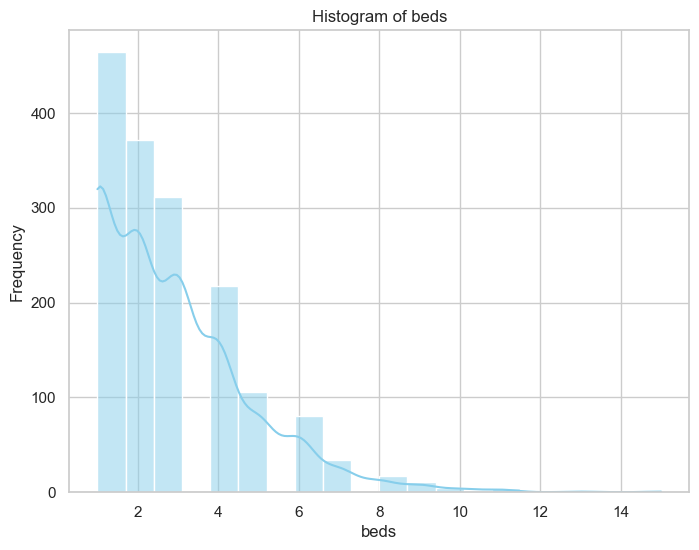

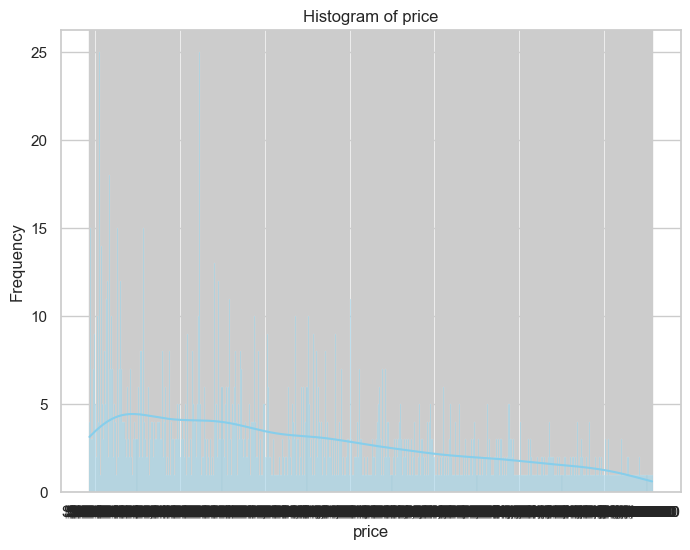

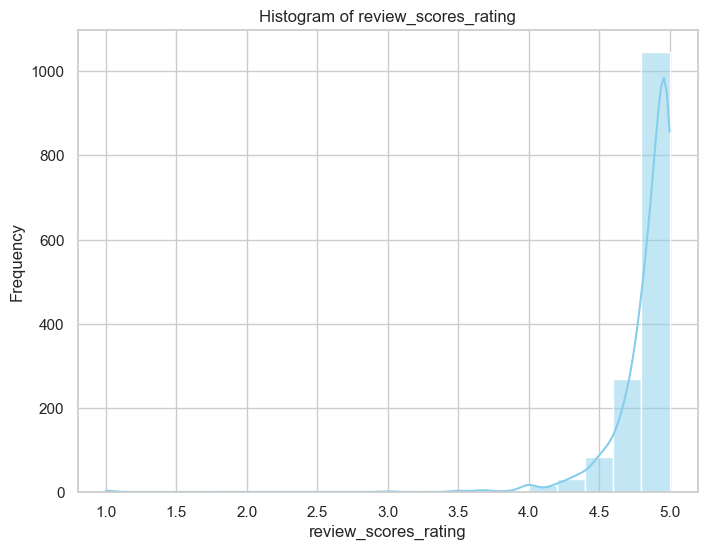

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot histograms of selected columns
sns.set(style="whitegrid")

# Define the selected columns
selected_columns = ['latitude', 'longitude', 'room_type', 'accommodates', 'beds', 'price', 'review_scores_rating']

# Plot histograms for each selected column
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(airbnb_data[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### Step 2: Exploratory Data Analysis on Tourism Points of Interest (POI) Dataset

#### Task:
Conduct exploratory data analysis (EDA) on the cleaned tourism points of interest (POI) dataset by identifying the top tourism categories.

#### Instructions:
1. **Identify Top Tourism Categories:** Count the occurrences of different tourism categories in the cleaned POI dataset and identify the top categories by using the Bar Plot.

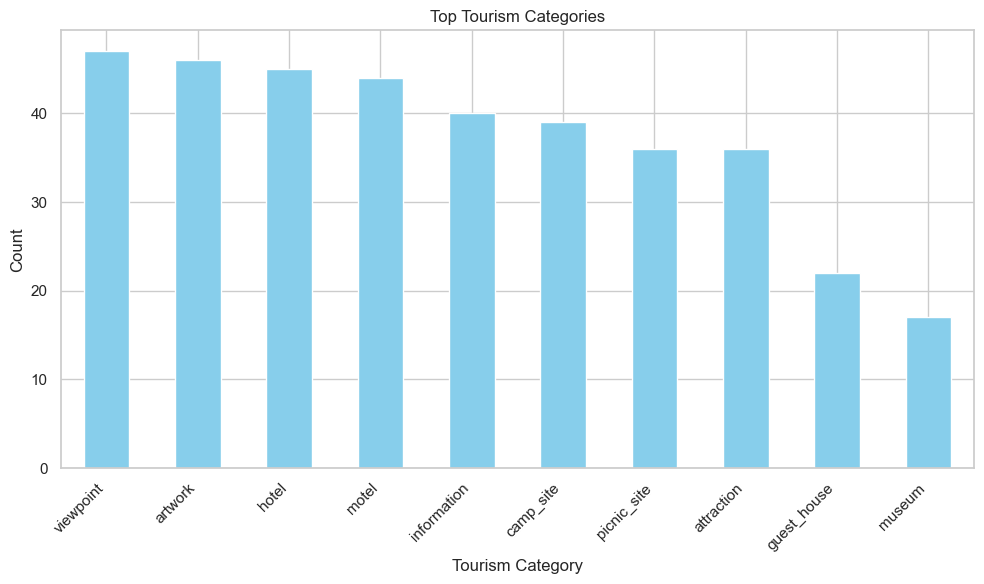

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of different tourism categories
top_categories = tourism_pois_cleaned['tourism'].value_counts().head(10)  # Get the top 10 categories

# Create a bar plot to visualize the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top Tourism Categories')
plt.xlabel('Tourism Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Step 3: Plotting Airbnb and Tourism Locations on Folium Map

#### Task:
Visualize the locations of Airbnb listings and tourism points of interest (POIs) on a Folium map, with markers colored based on rental price.

#### Instructions:
1. **Create Folium Map:** Create a Folium map object centered around the geographical coordinates of your chosen city or region.
2. **Plot Airbnb Locations:** Plot Airbnb locations as circle markers colored based on price.
3. **Plot Tourism Locations:** Plot tourism points of interest (POIs) as marker clusters.
4. **Plot Tourism Lines and Polygons:** Plot tourism lines and polygons using Folium `GeoJson`.


In [21]:
#!pip install folium
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon


geojson_data = './Assignment_3/neighbourhoods.geojson'

# Create a Folium map centered around the geographical coordinates of your chosen city or region
city_coordinates = (36.974117, -122.030792)  
mymap = folium.Map(location=city_coordinates, zoom_start=12)

# Create a folium map object
f = folium.Figure(width=800, height=500) # set figure size

# Plot Airbnb locations as circle markers colored based on price
for index, row in airbnb_data_cleaned.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.6,
                        popup=f"Price: ${row['price']}/night").add_to(mymap)
# Plot tourism points of interest (POIs) as marker clusters using the 'geometry' column
marker_cluster = MarkerCluster().add_to(mymap)
for index, row in tourism_pois_cleaned.iterrows():
    geometry = row['geometry']
    if isinstance(geometry, Point):
        # For Point objects, we can directly access latitude and longitude attributes
        folium.Marker(location=[geometry.y, geometry.x],
                      popup=row['name'],
                      icon=None).add_to(marker_cluster)
    elif isinstance(geometry, (Polygon, MultiPolygon)):
        # For Polygon or MultiPolygon objects, we take the centroid of the geometry
        centroid = geometry.centroid
        folium.Marker(location=[centroid.y, centroid.x],
                      popup=row['name'],
                      icon=None).add_to(marker_cluster)
        
# Add the GeoJSON data as a GeoJson layer to the Folium map
folium.GeoJson(
    geojson_data,
    name='Tourism Lines and Polygons'
).add_to(mymap)

# Plot tourism lines and polygons using Folium GeoJson
# You need GeoJson data for this part


# Save the map as an HTML file
mymap.save('airbnb_and_poi_map.html')

# display the map
mymap



## Part 4: Feature Engineering



### Step 1: Computing Nearby Tourism Points of Interest (POIs) for Each Airbnb Location

#### Task:
Compute nearby tourism points of interest (POIs) for each Airbnb location and add it as a feature to the Airbnb dataset.

#### Instructions:

1. **Convert Airbnb Data to GeoDataFrame:** Use Geopandas `points_from_xy()` to convert the cleaned Airbnb dataset to a GeoDataFrame by specifying the geometry column with latitude and longitude coordinates.

2. ***Check Coordinate Reference Systems (CRS):** Check if both the Airbnb GeoDataFrame and the tourism points of interest (POI) dataset have the same Coordinate Reference System (CRS). If the CRS of the Airbnb dataset is not defined, assign the CRS of the tourism POI dataset to the Airbnb dataset.

3. **Define Proximity Radius:** Choose a suitable proximity radius to define the distance within which to search for nearby tourism POIs around each Airbnb location (e.g. within 1 kilometer of each Airbnb listing).

4. **Compute Nearby POIs:** For each Airbnb location, calculate the distance to nearby tourism POIs within the defined radius.

5. **Add Feature to Airbnb Data:** Add the count of nearby tourism POIs as a new feature to the cleaned Airbnb dataset.



In [22]:
# name your converted airbnb_data_cleaned DataFrame to airbnb_data_cleaned_geo
airbnb_data_cleaned_geo =gpd.GeoDataFrame( airbnb_data_cleaned,
    geometry=gpd.points_from_xy(airbnb_data_cleaned.longitude, airbnb_data_cleaned.latitude)
)

# Check CRS and assign if necessary
if airbnb_data_cleaned_geo.crs is None:
    # Assign CRS from tourism POI dataset
    airbnb_data_cleaned_geo.crs = tourism_pois_cleaned.crs
    
# Compute nearby tourism POIs for each Airbnb location
# Assuming a maximum distance threshold of 1 kilometer
max_distance = 1000  # meters (1 kilometer)
nearby_pois = []
for _ , airbnb_row in airbnb_data_cleaned_geo.iterrows():
    nearby_poi_count = 0
    for _ , poi_row in tourism_pois_cleaned.iterrows():
        distance = airbnb_row.geometry.distance(poi_row.geometry)
        if distance <= max_distance:
            nearby_poi_count += 1
    nearby_pois.append(nearby_poi_count)



# Add nearby tourism POIs as a feature to the Airbnb dataset
airbnb_data_cleaned_geo['nearby_tourism_pois'] = nearby_pois


In [23]:
######### This is a test-cell that print the first few rows of the airbnb_data_cleaned_geo DataFrame #########

airbnb_data_cleaned_geo.head(3)

latitude  longitude        room_type  accommodates  beds  price  \
0  37.00939 -121.88547  Entire home/apt             3   2.0  168.0   
1  36.98048 -121.88129     Private room             2   1.0   95.0   
2  36.95849 -121.97207  Entire home/apt             2   1.0  197.0   

   review_scores_rating                     geometry  nearby_tourism_pois  
0                  4.88  POINT (-121.88547 37.00939)                  400  
1                  4.82  POINT (-121.88129 36.98048)                  400  
2                  4.73  POINT (-121.97207 36.95849)                  400


### Step 2: Feature Transformation and Normalization

#### Task:
Perform feature transformation and normalization to prepare the dataset for classification. Convert categorical columns to numerical representations and normalize numerical features. Additionally, transform the target variable (price) into bins and encode it for classification.


#### Why Convert Price to Bins:
The goal of classification is to predict the price class based on other features in the dataset. By converting the continuous target variable (price) into discrete bins, we transform the regression problem into a classification problem. This allows us to classify listings into price ranges based on their attributes such as room type, accommodation capacity, beds, review scores, and nearby tourist attractions, enabling more interpretable and actionable insights for decision-making.



#### Instructions:
1. **Convert Categorical Columns to Numerical:**
   - Identify categorical columns in the dataset (e.g., room_type) and convert them to numerical representations using techniques such as one-hot encoding or label encoding.

2. **Normalize Numerical Features:**
   - Normalize numerical features (e.g., accommodates, beds, review_scores_rating, tourist_attractions) to bring them to a similar scale. Common normalization techniques include Min-Max scaling or Z-score normalization.

3. **Transform Target Variable (Price) into Bins:**
   - Transform the target variable (price) into bins to create a categorical variable suitable for classification. Define bins that cover the price range from $0 to $500, with one additional bin for prices above $500.
   - Encode the target variable based on the defined bins (e.g., 10 bins between 0 and 500, and one bin for prices above 500).




In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import pandas as pd


# Define the number of bins for the target variable (price)
num_bins = 10

airbnb_data_cleaned_geo = airbnb_data_cleaned_geo.drop('geometry', axis = 1)
airbnb_data_cleaned_geo.head(1)

latitude  longitude        room_type  accommodates  beds  price  \
0  37.00939 -121.88547  Entire home/apt             3   2.0  168.0   

   review_scores_rating  nearby_tourism_pois  
0                  4.88                  400

In [25]:

# Convert categorical columns to numerical representations
categorical_cols = airbnb_data_cleaned_geo.select_dtypes(exclude = 'number')
print(categorical_cols)

for col in categorical_cols:
    label_encoder = LabelEncoder()
    airbnb_data_cleaned_geo[col] = label_encoder.fit_transform(airbnb_data_cleaned_geo[col])

# Normalize numerical features
numerical_cols = airbnb_data_cleaned_geo.select_dtypes(include = 'number').columns
scaler = MinMaxScaler()
airbnb_data_cleaned_geo[numerical_cols] = scaler.fit_transform(airbnb_data_cleaned_geo[numerical_cols])

# Transform target variable (price) into bins
price_bins = pd.cut(airbnb_data_cleaned_geo['price'], bins=num_bins, labels=list(range(num_bins)))
airbnb_data_cleaned_geo['price_bin'] = price_bins


            room_type
0     Entire home/apt
1        Private room
2     Entire home/apt
3     Entire home/apt
4        Private room
...               ...
1612  Entire home/apt
1614  Entire home/apt
1615  Entire home/apt
1619  Entire home/apt
1623  Entire home/apt

[1419 rows x 1 columns]


In [41]:
######### This is a test-cell that print the first few rows of the airbnb_data_cleaned_geo DataFrame #########

airbnb_data_cleaned_geo.head(3)

latitude  longitude  room_type  accommodates      beds     price  \
0  0.387606   0.688092   0.000000      0.133333  0.071429  0.013942   
1  0.316005   0.696155   0.666667      0.066667  0.000000  0.006620   
2  0.261542   0.521036   0.000000      0.066667  0.000000  0.016851   

   review_scores_rating  nearby_tourism_pois price_bin  
0                0.9700                  0.0         0  
1                0.9550                  0.0         0  
2                0.9325                  0.0         0

## Part 5: Classification


### Step 1: Data Splitting and Model Building

#### Task:
Prepare the data for classification by creating feature matrix (X) and target vector (y). Split the dataset into training and testing sets.

#### Instructions:
1. **Create Feature Matrix (X) and Target Vector (y):**
   - Define the feature matrix (X) containing the independent variables (features) used for classification, including attributes such as room_type, accommodates, beds, review_scores_rating, and tourist_attractions.
   - Define the target vector (y) containing the dependent variable (target) to be predicted, which is the price_class derived from the price variable.

2. **Split Data into Train and Test Sets:**
   - Split the dataset into training and testing sets, typically using a 70-30 or 80-20 split ratio.
   - The training set will be used to train the classification model, while the testing set will be used to evaluate its performance.




In [42]:
from sklearn.model_selection import train_test_split


# Define the features and target variable
X = airbnb_data_cleaned_geo.drop('price_bin', axis = 1)
y = airbnb_data_cleaned_geo.price_bin

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 0000)


In [43]:
######### This is a test-cell that print the train and test sets shapes #########

# print the train and test sets shapes
print(f'The shape of the training set is {X_train.shape}')
print(f'The shape of the testing set is {X_test.shape}')

# print the train and test sets shapes
print(f'The shape of the training set is {X_train.shape}')
print(f'The shape of the testing set is {X_test.shape}')

The shape of the training set is (1135, 8)
The shape of the testing set is (284, 8)
The shape of the training set is (1135, 8)
The shape of the testing set is (284, 8)


### Step 2: Build Decision Tree Classifier

#### Task:
Build a decision tree classifier using the scikit-learn library and fit the model to the training data.

#### Instructions:
1. **Import DecisionTreeClassifier:** Import the DecisionTreeClassifier class from the scikit-learn library.
2. **Instantiate and Fit the Classifier:** Initialize a decision tree classifier object, optionally specifying hyperparameters such as maximum depth, minimum samples split, and minimum samples leaf.
3. **Fit (train) the model:** Fit the decision tree classifier to the training data using the `fit()` method.

4. **Visualization of Decision Tree:** 
    - Define parameters such as feature names, class names, font size, and tree depth to customize the visualization of the decision tree.
    - Use the `plot_tree` from scikit-learn library function to plot the decision tree classifier, specifying the trained classifier object, feature names, class names, and other parameters to help better underestand the tree.

    ```python

    # Define feature names
    feature_names = ['Room Type', 'Accommodates', 'Beds', 'Review Scores Rating', 'Tourist Attractions']

    # Define class names
    class_names = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '500+']

    ```


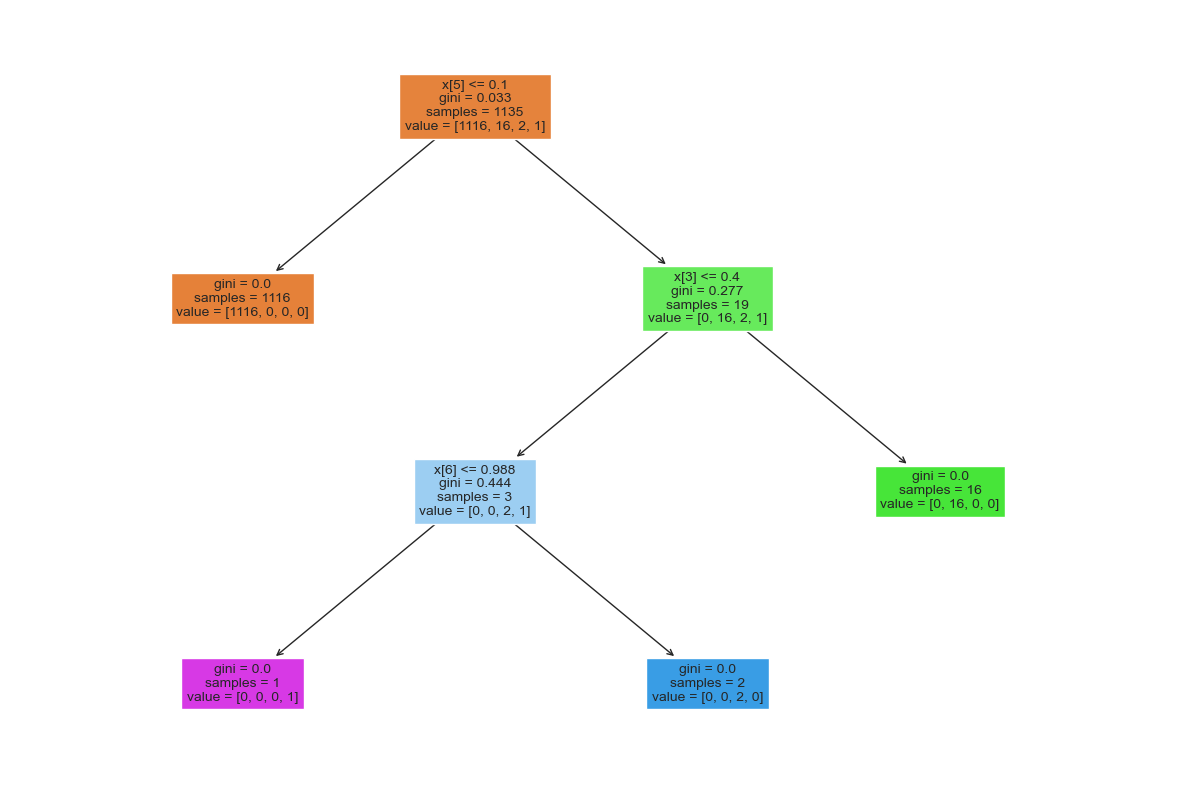

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

# Instantiate DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Visualization of Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, fontsize=10)
plt.show()


## Question 1: Explanation of Decision Tree


Explain the decision tree classifier that was visualized in the previous step. Describe the different levels, nodes, leaves, Gini indexes, and other relevant information to provide a comprehensive understanding of the decision-making process.


- Describe the structure of the decision tree, including levels, nodes, and leaves. Explain how each level represents a decision based on a feature, each node represents a split based on a feature threshold, and each leaf represents a final classification outcome.
   
- Discuss the importance of different features in the decision-making process. Identify which features have the greatest influence on the classification decisions.
   
- Interpret the Gini index at each node as a measure of impurity or uncertainty. Explain how the decision tree seeks to minimize the Gini index by making splits that separate the data into more homogeneous groups.

- Provide examples or instances from the decision tree to illustrate how the classification decisions are made based on the features and thresholds.


1. Structure of the Decision Tree:

i. Levels: The decision tree is organized into levels, with the root node at level 0 and subsequent levels   branching out from the root node.
ii. Nodes: Each level of the decision tree contains nodes, which represent decision points based on the values of features.
iii. Leaves: The terminal nodes of the decision tree are called leaves, which represent the final classification outcomes.

2. Decision-making Process:

i. Each level of the decision tree represents a decision based on a feature. The root node makes the first decision based on the most informative feature.
ii. Each node represents a split in the data based on a feature threshold. The decision tree algorithm chooses the feature and threshold that best separate the data into homogeneous groups.
iii. Each leaf node represents a final classification outcome. The decision tree assigns a class label to instances that reach the leaf based on the majority class of training instances in that leaf.

3. Importance of Features:

i. Features that appear closer to the root of the decision tree are more important in the decision-making process. These features have a greater influence on classification decisions as they provide more discriminatory power.
ii. The importance of features can be inferred from the depth of the decision tree branches and the frequency of feature splits.

4. Gini Index:

i. The Gini index is a measure of impurity or uncertainty at each node of the decision tree.
ii. The decision tree seeks to minimize the Gini index by making splits that separate the data into more homogeneous groups.
iii. A lower Gini index indicates a more homogeneous group of instances at a node, leading to more confident classification decisions.

5. Examples from the Decision Tree:

i.  For example, at the root node, the decision tree may split the data based on the feature "room type" with thresholds like "entire home/apt" or "private room".
ii. Subsequent nodes may further split the data based on features like "accommodates", "beds", or "review scores rating", leading to more refined classification decisions.
iii. Instances reaching the leaf nodes are classified into price ranges (e.g., "0-50", "51-100", etc.) based on the majority class of instances in each leaf.





### Part 6: Model Evaluation


### Step 1: Evaluation of Multiple Classification Models

#### Task:
Perform evaluation of multiple classification models on the dataset. Train and evaluate the following models: ID3/C4.5, CART, Naïve-Bayesian classifier, and Ensemble methods such as Adaboost. Evaluate each model using different evaluation metrics to assess their performance.

#### Instructions:
1. **Train and Evaluate Models:**
   - Train each classification model using the training data obtained from the train-test split.
   - Evaluate the performance of each model using various evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

2. **Select Evaluation Metrics:**
   - Choose appropriate evaluation metrics based on the characteristics of the classification task and the desired performance criteria.
   - Use accuracy as a general measure of classification performance. Additionally, consider precision, recall, F1-score for binary classification tasks, and ROC-AUC for evaluating the performance of binary classifiers.

3. **Model Selection and Parameter Tuning:**
   - For decision tree classifiers (ID3/C4.5 and CART), specify the `criterion` parameter as `'entropy'` for ID3/C4.5 and `'gini'` for CART. Experiment with different values of hyperparameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf` to optimize model performance.
   - For the Naïve-Bayesian classifier, there are typically no hyperparameters to tune. However, you can explore different variations such as `GaussianNB` or `MultinomialNB` depending on the distribution of the features.
   - For Adaboost, you can adjust hyperparameters such as the base estimator (e.g., decision tree), number of estimators, and learning rate to improve model performance.



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Initialize models
models = {
    "ID3/C4.5 Decision Tree": DecisionTreeClassifier(criterion="entropy"),
    "CART Decision Tree": DecisionTreeClassifier(criterion="gini"),
    "Naïve-Bayesian Classifier": GaussianNB(),
    "Adaboost Classifier": AdaBoostClassifier()
}

# Train and Evaluate each model
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"Model: {name}")
    print(f"{model} Accuracy: {accuracy:.4f}")
    print(f"{model} Precision: {precision:.4f}")
    print(f"{model} Recall: {recall:.4f}")
    print(f"{model} F1-Score: {f1:.4f}")
    print(f"{model} ROC-AUC: {roc_auc:.4f}")
    print("\n")


Model: ID3/C4.5 Decision Tree
DecisionTreeClassifier(criterion='entropy') Accuracy: 1.0000
DecisionTreeClassifier(criterion='entropy') Precision: 1.0000
DecisionTreeClassifier(criterion='entropy') Recall: 1.0000
DecisionTreeClassifier(criterion='entropy') F1-Score: 1.0000
DecisionTreeClassifier(criterion='entropy') ROC-AUC: 1.0000


Model: CART Decision Tree
DecisionTreeClassifier() Accuracy: 0.9965
DecisionTreeClassifier() Precision: 1.0000
DecisionTreeClassifier() Recall: 0.9965
DecisionTreeClassifier() F1-Score: 0.9981
DecisionTreeClassifier() ROC-AUC: 1.0000


Model: Naïve-Bayesian Classifier
GaussianNB() Accuracy: 0.9190
GaussianNB() Precision: 0.9772
GaussianNB() Recall: 0.9190
GaussianNB() F1-Score: 0.9400
GaussianNB() ROC-AUC: 0.9582




C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Adaboost Classifier
AdaBoostClassifier() Accuracy: 1.0000
AdaBoostClassifier() Precision: 1.0000
AdaBoostClassifier() Recall: 1.0000
AdaBoostClassifier() F1-Score: 1.0000
AdaBoostClassifier() ROC-AUC: 1.0000




### Question 2: Model Comparison and Analysis

Discuss and explain the evaluation results obtained from the multiple classification models. Compare the performance of each model based on different evaluation metrics and provide insights into which model is better suited for the task.

1. **Compare Evaluation Metrics:**
   - Compare the performance of each classification model based on evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

2. **Consider Model Complexity:**
   - Take into account the complexity of each model and the computational resources required for training and inference.
   - Consider whether simpler models (e.g., Naïve-Bayesian classifier) perform comparably well to more complex models (e.g., decision trees, ensemble methods).

3. **Interpretation of Evaluation Metrics:**
   - Provide interpretations for the evaluation metrics and their implications for the classification task.
   - Consider the trade-offs between different metrics and the specific requirements of the application.

4. **Recommendation for Model Selection:**
   - Based on the evaluation results and analysis, make recommendations for model selection.
   - Identify the model that performs best overall or is most suitable for the specific requirements of the task.



**1. Compare Evaluation Metrics:**

i. Accuracy: Measures the overall correctness of the model's predictions.
ii. Precision: Measures the proportion of true positive predictions among all positive predictions made by the model.
iii. Recall: Measures the proportion of true positive predictions among all actual positive instances in the dataset.
iv. F1-Score: Harmonic mean of precision and recall, providing a balance between the two metrics.
v. ROC-AUC: Area under the Receiver Operating Characteristic (ROC) curve, which indicates the model's ability to distinguish between classes.

**2. Consider Model Complexity:**

i. Decision trees and ensemble methods like Adaboost tend to be more complex and may require more computational resources for training and inference compared to simpler models like Naïve-Bayesian classifier.
ii. However, more complex models may offer higher accuracy and better performance on certain metrics.

**3. Interpretation of Evaluation Metrics:**

i. Accuracy: Provides a general measure of the model's correctness, but it may not be suitable for imbalanced datasets.

ii. Precision and Recall: Important for tasks where false positives or false negatives have significant consequences. A high precision indicates low false positive rate, while a high recall indicates low false negative rate.

iii. F1-Score: Useful for balancing precision and recall, especially when there is an imbalance between classes.

iv. ROC-AUC: Indicates the model's ability to discriminate between classes, with higher values indicating better performance.

**4. Recommendations for Model Selection:**

i. If computational resources are limited or simplicity is preferred, consider the Naïve-Bayesian classifier, which often performs well on text classification tasks and has low computational overhead.

ii. For balanced datasets and when both precision and recall are important, decision trees like CART or ensemble methods like Adaboost may be suitable options.

iii. Evaluate the trade-offs between different evaluation metrics based on the specific requirements of the application. For example, in medical diagnosis, recall (sensitivity) might be more important than precision.


### Step 2: Feature Importance Analysis

#### Task:
Conduct feature importance analysis to identify the most influential features for predicting Airbnb prices. This analysis will help in understanding which features have the greatest impact on the classification task and can inform feature selection and model interpretation.

#### Instructions:
1. **Compute Feature Importance:**
   - Use appropriate techniques such as `feature_importances_` attribute for decision tree-based models (e.g., ID3, CART, Adaboost) to compute feature importance scores.

2. **Rank Features:**
   - Rank the features based on their importance scores, with higher scores indicating greater importance in predicting Airbnb prices.

3. **Visualization:**
   - Visualize the feature importance scores using bar plots or other suitable visualization techniques. This will provide a clear understanding of the relative importance of each feature.



<Axes: >

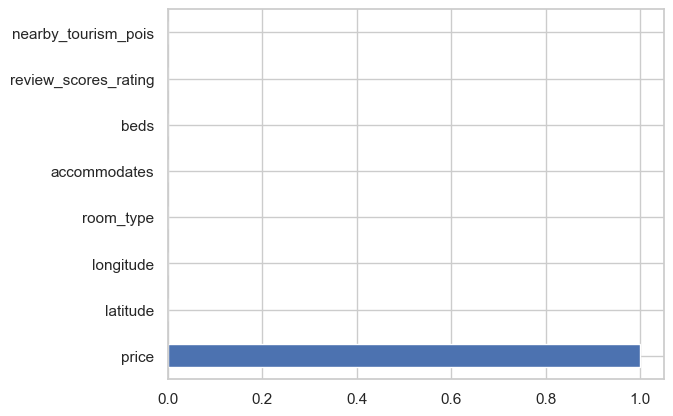

In [60]:

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(70).plot(kind='barh')


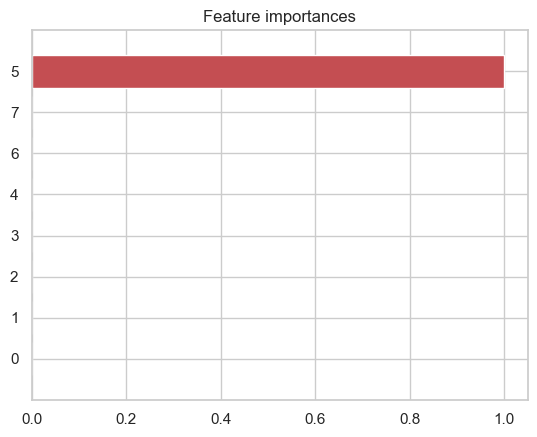

In [61]:
import numpy as np

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

### Question 3: Interpretation of Feature Importance Analysis 

Interpret the results of the feature importance analysis. Discuss the top features that have the most significant impact on predicting Airbnb prices and provide insights into their relevance to the classification task.

- Which features have the highest importance scores in predicting Airbnb prices for each model?
- How do the importance scores of different features compare to each other?
- Are there any unexpected or counterintuitive findings in the feature importance analysis?





YOUR ANSWER HERE



### Step 3: Price Range Recommendation

#### Task:
Use the best-performing classification model to recommend an Airbnb price range for some random sample Airbnb rentals based on their features.


#### Instructions:
1. **Select Best Classifier:**
   - Choose the best-performing classification model based on the evaluation results obtained in earlier steps.

2. **Random Sample Selection:**
   - Select a random sample of Airbnb rentals from the dataset for which you want to recommend a price range.

3. **Feature Input:**
   - Input the features of the selected Airbnb rentals into the chosen classification model to obtain predicted price bins or classes.

4. **Price Range Recommendation:**
   - Based on the predicted price bins or classes, recommend a suitable price range for each Airbnb rental.





In [ ]:


# YOUR CODE HERE

raise NotImplementedError()


